In [28]:
# Import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


data = pd.read_csv(
    "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv"
)

In [9]:
data.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  1565930130  20141104T000000         4       3.25         3760      4675   
1  3279000420  20150115T000000         3       1.75         1460      7800   
2   194000575  20141014T000000         4       1.00         1340      5800   
3  2115510160  20141208T000000         3       1.75         1440      8050   
4  7522500005  20140815T000000         2       1.50         1780      4750   

   floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0     2.0           0     0          3  ...        2740           1020   
1     1.0           0     0          2  ...        1040            420   
2     1.5           0     2          3  ...        1340              0   
3     1.0           0     0          3  ...        1440              0   
4     1.0           0     0          4  ...        1080            700   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      2007             0    98038  47.3862 -122.048           3280   
1      1979             0    98023  47.3035 -122.382           1310   
2      1914             0    98116  47.5658 -122.389           1900   
3      1985             0    98023  47.3187 -122.390           1790   
4      1947             0    98117  47.6859 -122.395           1690   

   sqft_lot15     price  
0        4033  429900.0  
1        7865  233000.0  
2        5800  455000.0  
3        7488  258950.0  
4        5962  555000.0  

[5 rows x 21 columns]

In [10]:
columns = data.columns.tolist()


def display_columns(columns):
    for column in columns:
        print(column)


print(f"COLUMNS: \n---------------")
display_columns(columns)
print(f"---------------\n")

COLUMNS: 
---------------
id
date
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15
price
---------------



In [11]:
data_types = data.dtypes
print(f"DATA TYPES: \n---------------\n {data_types}")
print(f"---------------\n")

DATA TYPES: 
---------------
 id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
dtype: object
---------------



In [12]:
missing_data_summary = data.isnull().sum()
print(f"MISSING DATA: \n---------------\n {missing_data_summary}")
print(f"---------------\n")

MISSING DATA: 
---------------
 id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64
---------------



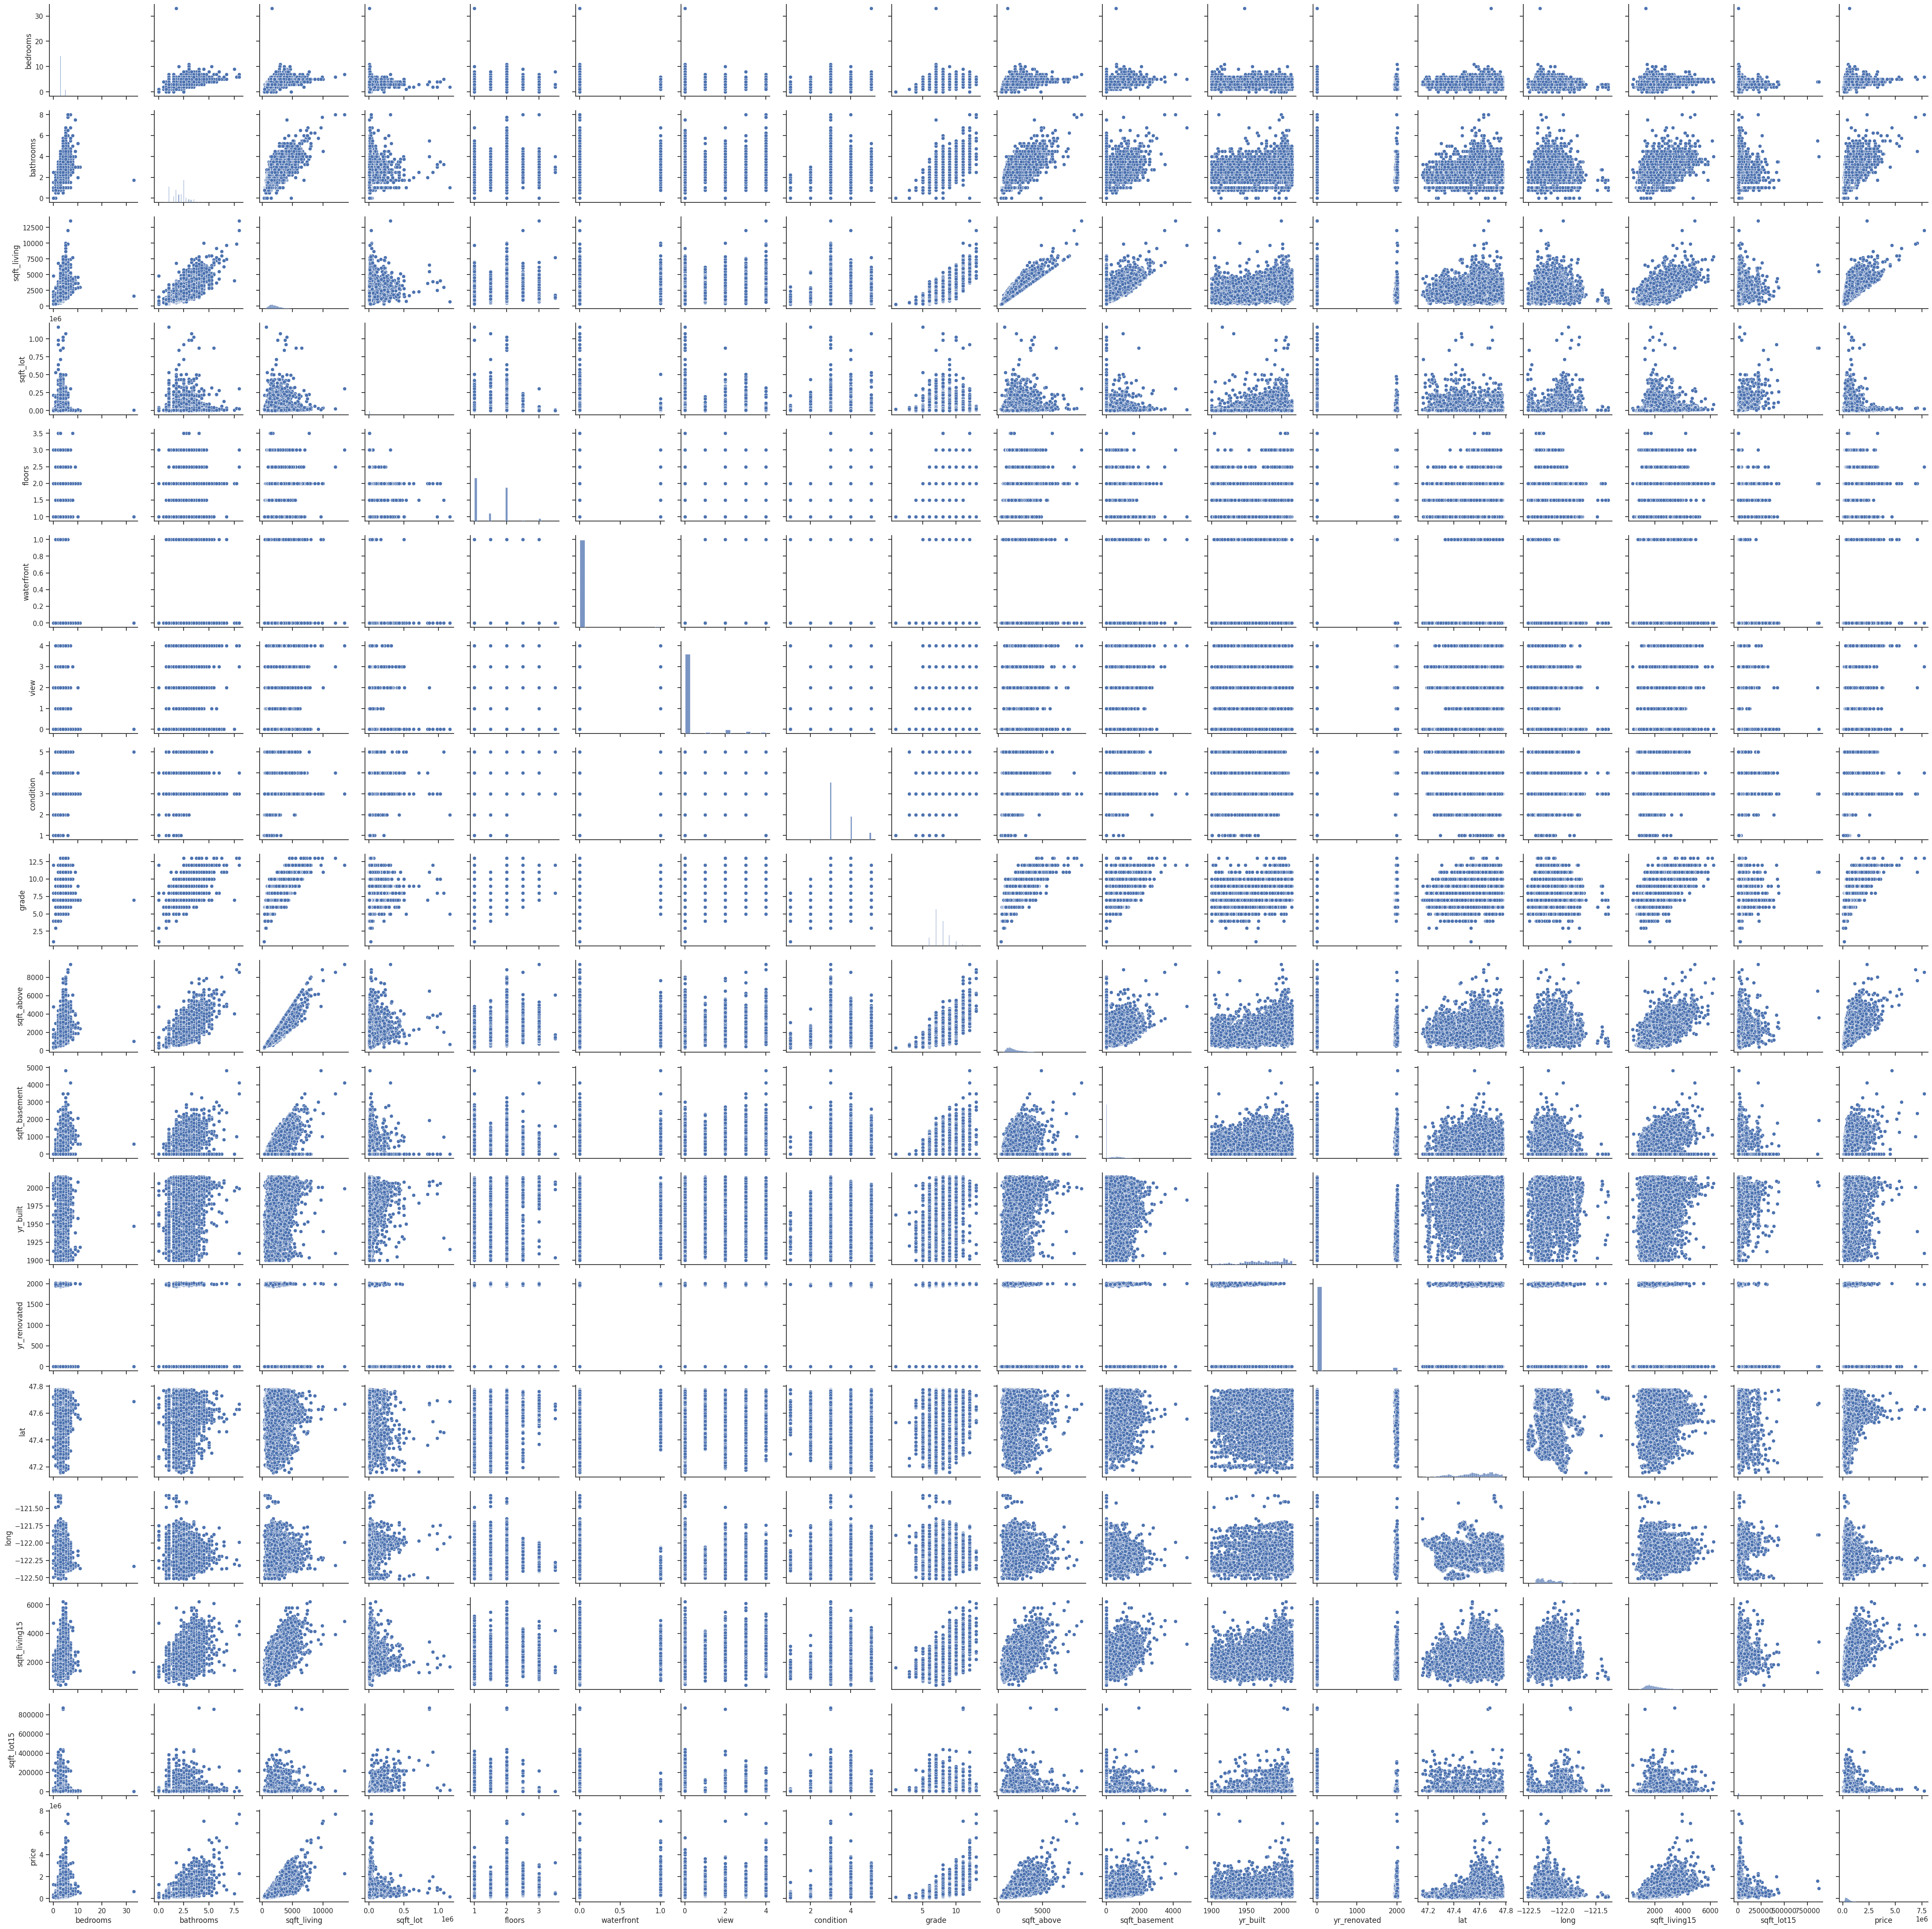

In [13]:
numerical_columns = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "waterfront",
    "view",
    "condition",
    "grade",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "yr_renovated",
    "lat",
    "long",
    "sqft_living15",
    "sqft_lot15",
    "price",
]

# Create a pairplot for correlation visualization
sns.set(style="ticks")
sns.pairplot(data[numerical_columns])
plt.show()

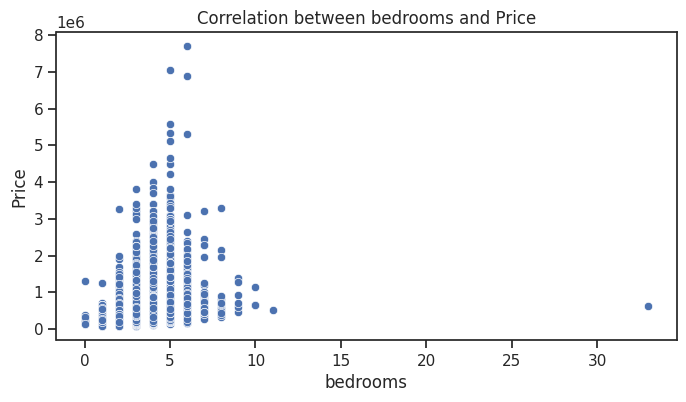

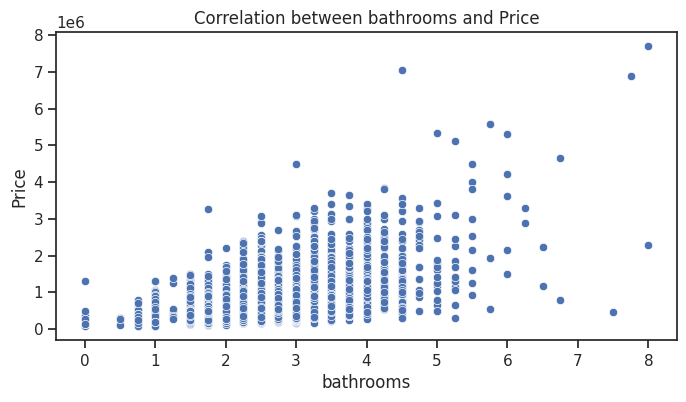

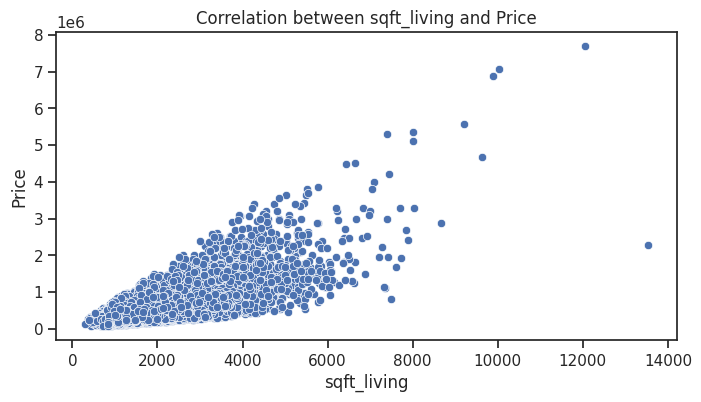

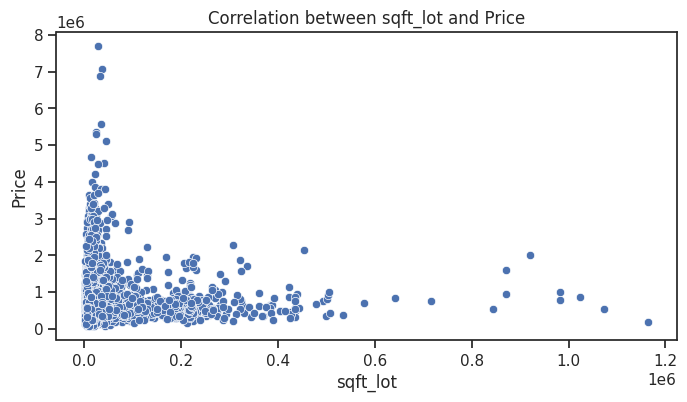

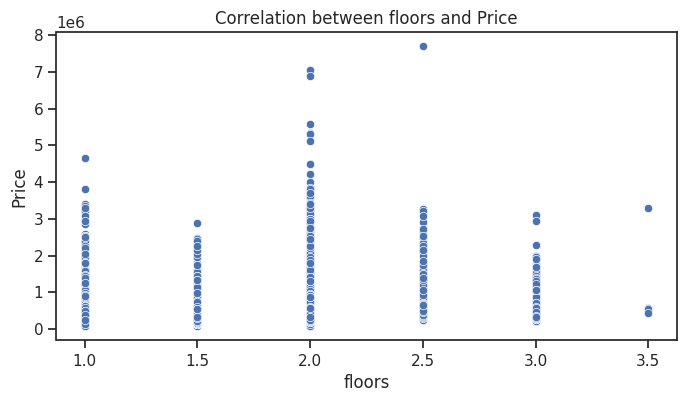

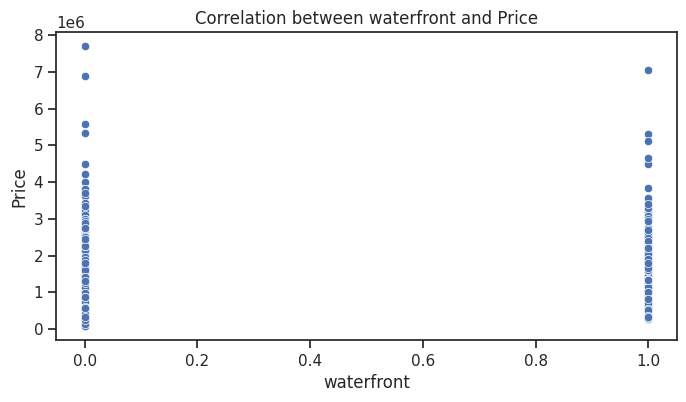

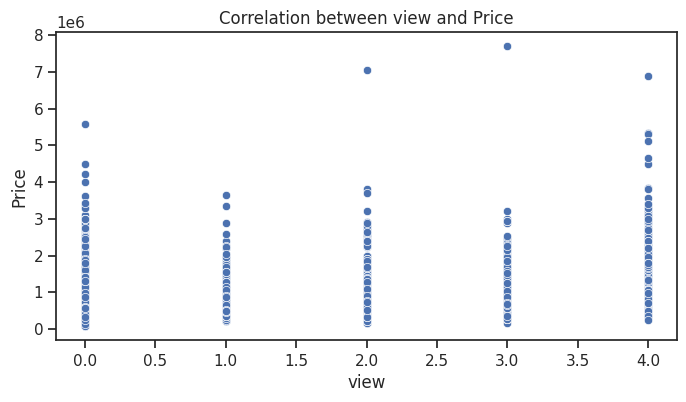

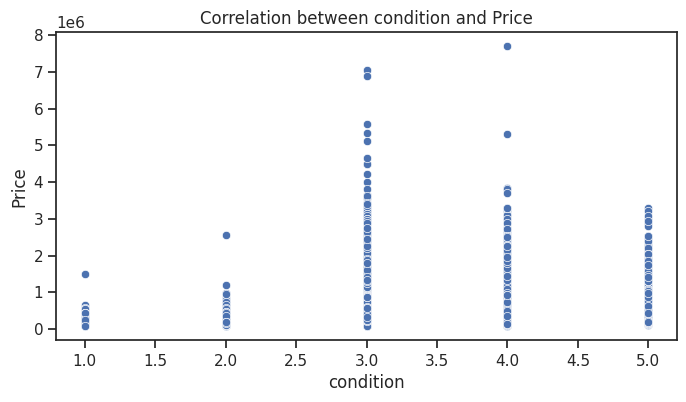

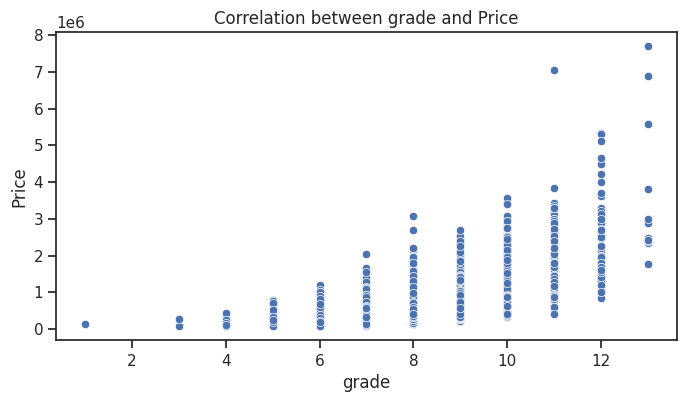

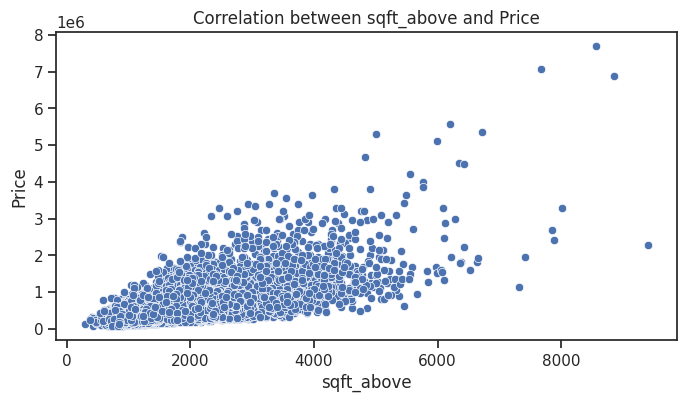

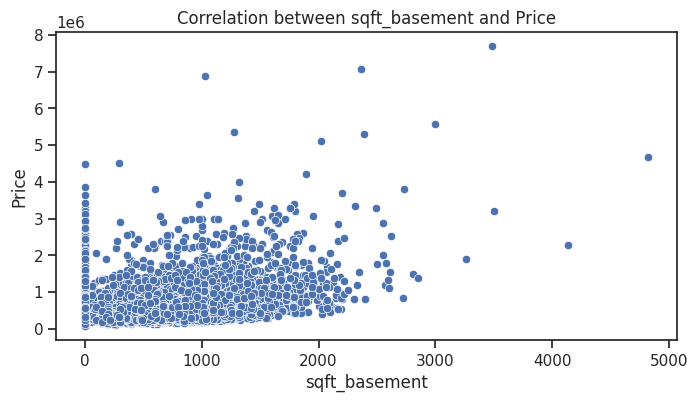

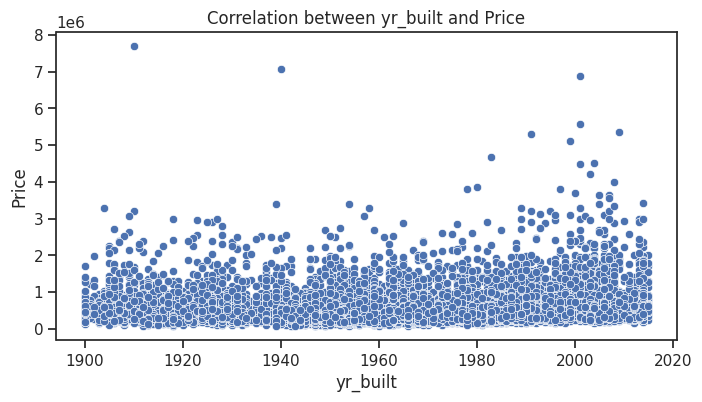

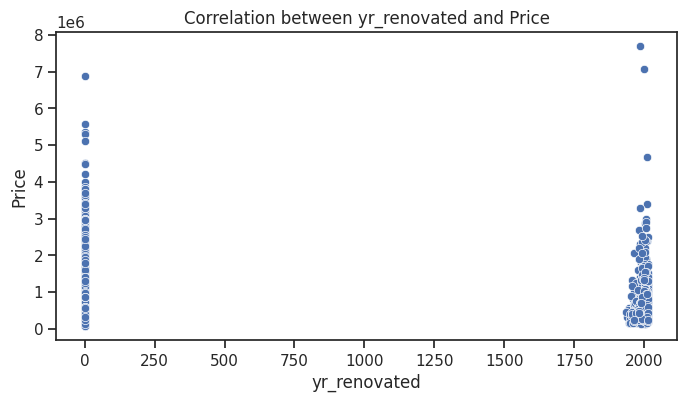

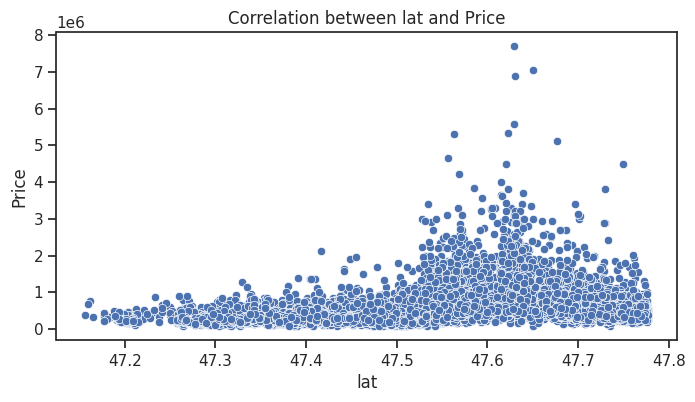

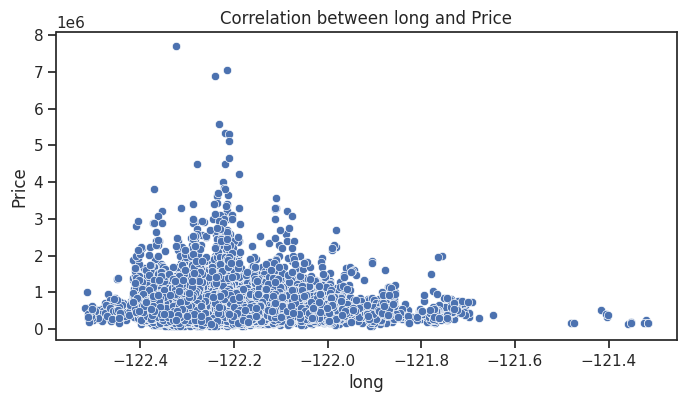

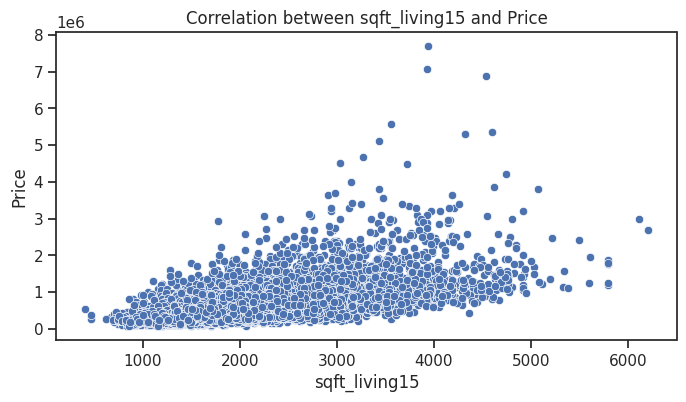

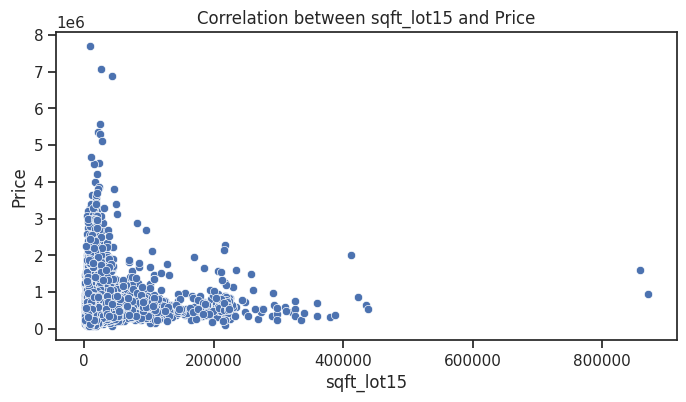

In [14]:
feature_columns = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "waterfront",
    "view",
    "condition",
    "grade",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "yr_renovated",
    "lat",
    "long",
    "sqft_living15",
    "sqft_lot15",
]

# Create individual scatter plots for each feature vs. price
for column in feature_columns:
    plt.figure(figsize=(8, 4))
    
    sns.scatterplot(data=data, x=column, y="price")
    plt.title(f"Correlation between {column} and Price")
    plt.xlabel(column)
    plt.ylabel("Price")
    plt.show()

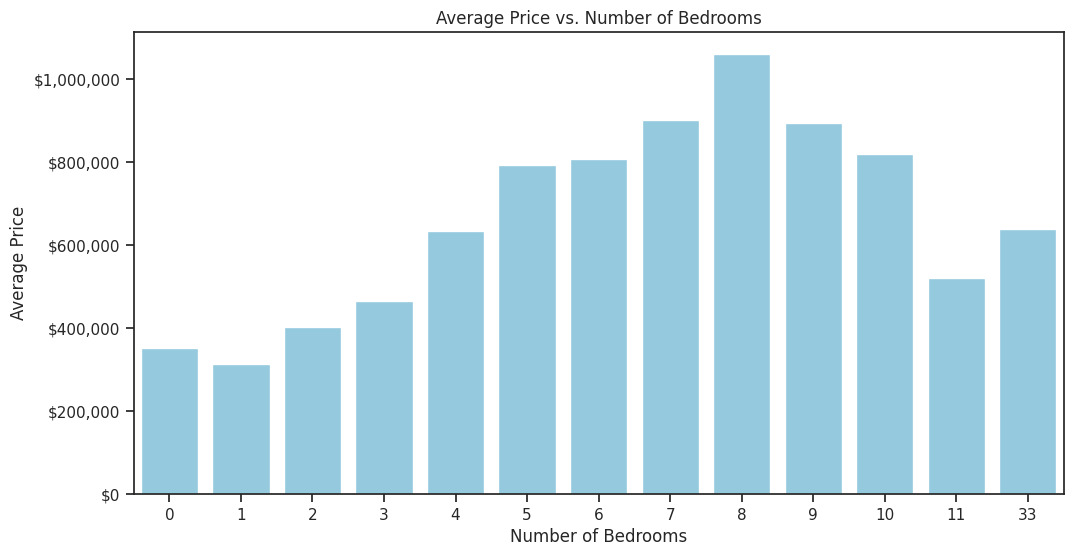

In [30]:
# Unique values of bedrooms
unique_bedrooms = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]

# Calculate the average price for each unique number of bedrooms
avg_prices = []
for num_bedrooms in unique_bedrooms:
    avg_price = data[data["bedrooms"] == num_bedrooms]["price"].mean()
    avg_prices.append(avg_price)

# Create a bar plot with thicker bars and no gap between 11 and 33 bedrooms
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=unique_bedrooms, y=avg_prices, color="skyblue")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.title("Average Price vs. Number of Bedrooms")


# Format the y-axis labels with commas and a dollar sign
def price_formatter(x, pos):
    return f"${x:,.0f}"


ax.yaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.show()

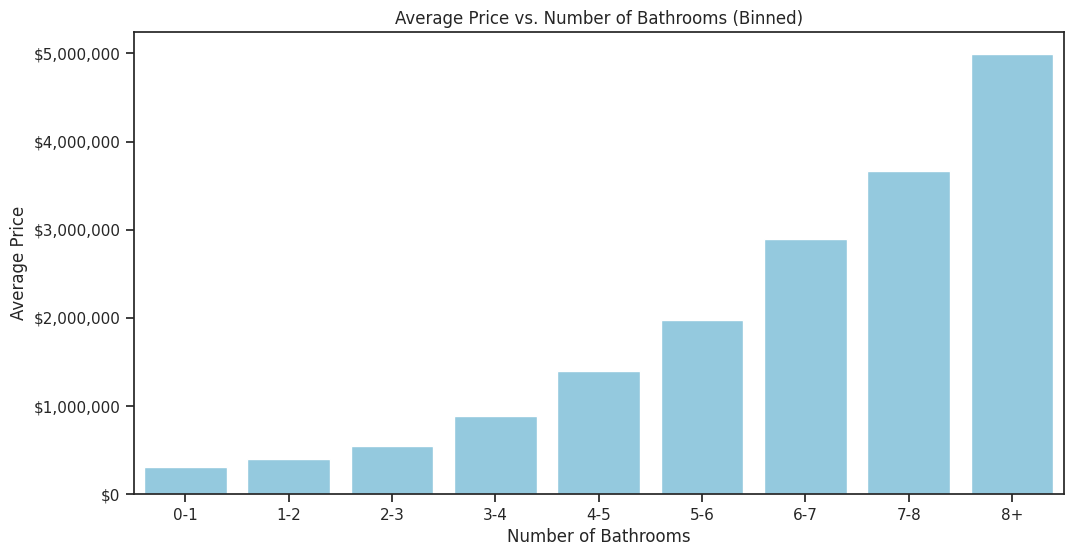

In [37]:
# Define bins for the bathrooms feature
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, float("inf")]
labels = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8+"]

# Bin the bathrooms feature
data["bathrooms_bin"] = pd.cut(data["bathrooms"], bins=bins, labels=labels, right=False)

# Calculate the average price for each bathroom bin
avg_prices = data.groupby("bathrooms_bin")["price"].mean()

# Create a bar plot for bathroom bins vs. average price
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_prices.index, y=avg_prices.values, color="skyblue")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Average Price")
plt.title("Average Price vs. Number of Bathrooms (Binned)")


# Format the y-axis labels with commas and a dollar sign
def price_formatter(x, pos):
    return f"${x:,.0f}"


ax.yaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.show()